# Parte A.p4

# 1. Configuraciones iniciales

## 1.1 Import de librerias

In [60]:
import pandas as pd
from pandas import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from funpymodeling import status, freq_tbl
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import hdbscan

from copy import deepcopy
from yellowbrick.cluster.elbow import kelbow_visualizer

from funpymodeling.model_validation import coord_plot

import plotly.express as px

In [2]:
# Configuraciones
pd.set_option('display.max_columns', None)

## 1.2 Lectura de datos

In [3]:
data = pd.read_csv("../data/ohe_customer_dataset.csv", sep=",")

In [4]:
data.head()

,transactionAmount,transactionFailed,fraudulent,"orderAmount_(9.999, 18.4]","orderAmount_(18.4, 30.0]","orderAmount_(30.0, 39.0]","orderAmount_(39.0, 47.0]","orderAmount_(47.0, 353.0]",orderAmount_unknown,orderState_failed,orderState_fulfilled,orderState_pending,paymentMethodRegistrationFailure_False,paymentMethodRegistrationFailure_True,paymentMethodType_apple pay,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,paymentMethodProvider_American Express,paymentMethodProvider_Diners Club / Carte Blanche,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,paymentMethodIssuer_Bastion Banks,paymentMethodIssuer_Bulwark Trust Corp.,paymentMethodIssuer_Citizens First Banks,paymentMethodIssuer_Fountain Financial Inc.,paymentMethodIssuer_Grand Credit Corporation,paymentMethodIssuer_Her Majesty Trust,paymentMethodIssuer_His Majesty Bank Corp.,paymentMethodIssuer_Rose Bancshares,paymentMethodIssuer_Solace Banks,paymentMethodIssuer_Vertex Bancorp,paymentMethodIssuer_weird,emailDomain_biz,emailDomain_com,emailDomain_info,emailDomain_net,emailDomain_org,emailDomain_weird,emailProvider_gmail,emailProvider_hotmail,emailProvider_other,emailProvider_weird,emailProvider_yahoo,customerIPAdress_checked_long_address,customerIPAdress_checked_short_address,sameCity_no,sameCity_unknown,sameCity_yes
0,"(9.999, 22.0]",False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True
1,"(22.0, 34.0]",False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,True,False,False
2,"(34.0, 46.0]",False,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False
3,"(22.0, 34.0]",False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,False,False
4,"(34.0, 46.0]",True,True,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,True,False,False


Utilizamos columnas relevantes

In [28]:
filter_data = data[["orderState_failed", "orderState_fulfilled", "orderState_pending", "fraudulent","transactionFailed", "customerIPAdress_checked_long_address"]].copy()

In [29]:
filter_data.head()

,orderState_failed,orderState_fulfilled,orderState_pending,fraudulent,transactionFailed,customerIPAdress_checked_long_address
0,False,False,True,False,False,False
1,False,True,False,False,False,False
2,False,True,False,True,False,True
3,False,True,False,True,False,True
4,False,True,False,True,True,False


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2) Clustering con K-means

## 2.1) Normalizado

In [31]:
std_scaler = StandardScaler()
std_scaler.fit(filter_data)
x_data_norm=std_scaler.transform(filter_data)

pd.DataFrame(x_data_norm).describe()

,0,1,2,3,4,5
count,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02,8.190000e+02
mean,-1.735147e-17,-6.940588e-17,-5.205441e-17,-6.940588e-17,-1.301360e-17,1.041088e-16
std,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00,1.000611e+00
min,-2.549892e-01,-9.770639e-01,-1.881442e-01,-1.112522e+00,-5.872202e-01,-3.221391e-01
25%,-2.549892e-01,-9.770639e-01,-1.881442e-01,-1.112522e+00,-5.872202e-01,-3.221391e-01
50%,-2.549892e-01,-9.770639e-01,-1.881442e-01,8.988587e-01,-5.872202e-01,-3.221391e-01
75%,-2.549892e-01,1.023474e+00,-1.881442e-01,8.988587e-01,1.702939e+00,-3.221391e-01
max,3.921734e+00,1.023474e+00,5.315073e+00,8.988587e-01,1.702939e+00,3.104249e+00


## 2.2) Creación del modelo

In [32]:
cl_model = KMeans(
    n_clusters=3,     
    init='k-means++',
    max_iter=100, 
    random_state=0,
    n_init='auto'  
)

cl_model.fit(x_data_norm)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,100
,tol,0.0001
,verbose,0
,random_state,0
,copy_x,True
,algorithm,'lloyd'


In [33]:
pred_cl = cl_model.predict(x_data_norm)
pred_cl

array([0, 0, 0, 0, 1, 2, 1, 0, 1, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 1, 2, 1, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0,
       0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 2,

c:\Users\ASUS\Documents\GitHub\final_project\env\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (28). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\ASUS\Documents\GitHub\final_project\env\lib\site-packages\sklearn\base.py:1363: ConvergenceWarning: Number of distinct clusters (27) found smaller than n_clusters (29). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


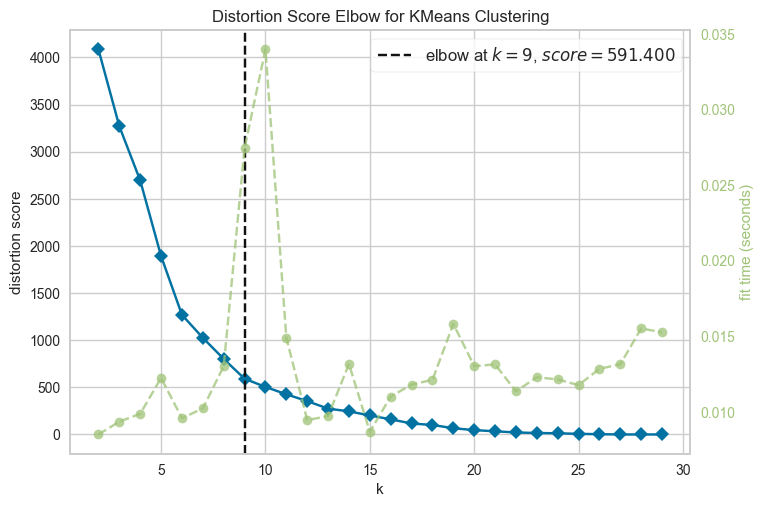

,estimator,KMeans(max_it...andom_state=0)
,ax,<Axes: title=...ortion score'>
,k,"(2, ...)"
,metric,'distortion'
,distance_metric,'euclidean'
,timings,True
,locate_elbow,True
,n_clusters,29
,init,'k-means++'
,n_init,'auto'
,max_iter,100


In [34]:


cl_model2=deepcopy(cl_model) # ojo

kelbow_visualizer(cl_model2, x_data_norm, k=(2,30), locate_elbow=True)

## 2.3) Grafico de coordenadas

In [42]:
cluster_var='cluster'
x_data_cl=filter_data.copy() 
x_data_cl[cluster_var]=cl_model.predict(x_data_norm)

In [43]:
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,fraudulent,transactionFailed,customerIPAdress_checked_long_address,cluster
0,False,False,True,False,False,False,0
1,False,True,False,False,False,False,0
2,False,True,False,True,False,True,0
3,False,True,False,True,False,True,0
4,False,True,False,True,True,False,1


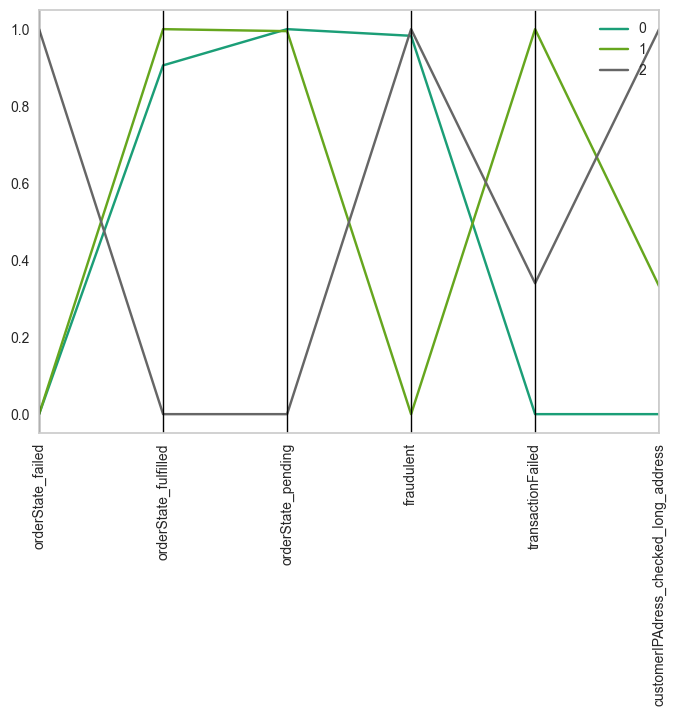

In [44]:

d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

Insights a partir del grafico:
- Cluster 0: Podria leerse como un cluster de transacciones que fueron concretadas, pasaron desapercibidas, pero fueron fraudulentas.
- Cluster 1: Transacciones legitimas con algunos problemas operacionales, no fueron fraudulentas aunque algunas lo parecian.
- Cluster 2: Son trasacciones que algunas fallaron, las ordenes fallaron, y resultaron ser fraudulentas, posible fraude.

In [45]:
d_orig

,orderState_failed,orderState_fulfilled,orderState_pending,fraudulent,transactionFailed,customerIPAdress_checked_long_address,cluster
0,0.0,0.506944,0.036458,0.578125,0.00,0.083333,0
1,0.0,0.559585,0.036269,0.471503,1.00,0.108808,1
2,1.0,0.000000,0.000000,0.580000,0.34,0.160000,2


In [46]:
d_transf

,orderState_failed,orderState_fulfilled,orderState_pending,fraudulent,transactionFailed,customerIPAdress_checked_long_address,cluster
0,0.0,0.905928,1.000000,0.982718,0.00,0.000000,0
1,0.0,1.000000,0.994819,0.000000,1.00,0.332282,1
2,1.0,0.000000,0.000000,1.000000,0.34,1.000000,2


## 2.4) Scatter 3D

In [40]:
status(filter_data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,orderState_failed,0,0.0,769,0.938950,2,bool
1,orderState_fulfilled,0,0.0,419,0.511600,2,bool
2,orderState_pending,0,0.0,791,0.965812,2,bool
3,fraudulent,0,0.0,366,0.446886,2,bool
4,transactionFailed,0,0.0,609,0.743590,2,bool
5,customerIPAdress_checked_long_address,0,0.0,742,0.905983,2,bool


In [49]:
fig = px.scatter_3d(filter_data, x='orderState_failed', y='customerIPAdress_checked_long_address', z='transactionFailed', color='fraudulent')
fig.show()

Como se opto ppor dejar 2 clases y no un semaforo, se procede a dos tecnicas: hacer el grafico por clusters y agregar un random para separar puntos.

In [55]:
fig = px.scatter_3d(x_data_cl, 
                   x='orderState_failed', 
                   y='customerIPAdress_checked_long_address', 
                   z='transactionFailed', 
                   color='cluster',
                   #symbol='fraudulent',
                   title='Clusters y Fraude en 3D')

In [56]:
fig.show()

In [54]:
# Agregar pequeña variación aleatoria para evitar superposición
filter_data_jitter = filter_data.copy()
for col in ['orderState_failed', 'customerIPAdress_checked_long_address', 'transactionFailed']:
    filter_data_jitter[col] += np.random.normal(0, 0.05, len(filter_data))

fig = px.scatter_3d(filter_data_jitter, 
                   x='orderState_failed', 
                   y='customerIPAdress_checked_long_address', 
                   z='transactionFailed', 
                   color='fraudulent',
                   title='Distribución 3D de Variables de Fraude')

fig.show()

En el gráfico por clusters queda mas claro, recordando que los mas importantes son el 0 y el 2. Podria decirse que cuando no caigan en 1 seria una muy buena señal para analizar esa transacción.

# 3) Clustering con HDBSCAN

## 3.1) Creación del modelo

Se creara un modelo de HDBSCAN con 15 clusters a partir de filter_data

In [58]:
model_hdb = hdbscan.HDBSCAN(min_cluster_size=15).fit(filter_data)

c:\Users\ASUS\Documents\GitHub\final_project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

c:\Users\ASUS\Documents\GitHub\final_project\env\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [81]:
freq_tbl(model_hdb.labels_.astype('str'))

,0,frequency,percentage,cumulative_perc
0,9,161,0.196581,0.196581
1,8,140,0.17094,0.367521
2,6,108,0.131868,0.499389
3,10,102,0.124542,0.623932
4,-1,70,0.08547,0.709402
5,0,45,0.054945,0.764347
6,3,44,0.053724,0.818071
7,4,44,0.053724,0.871795
8,1,36,0.043956,0.915751
9,5,25,0.030525,0.946276


Terminan quedad 10 clusters, ya que el cluster -1 (ruido) no es el de mayor frecuencia.

## 3.2) Profiling

In [83]:
cluster_var='cluster'
x_data_cl=filter_data.copy()
x_data_cl[cluster_var]=model_hdb.labels_

In [64]:
x_data_cl.head()

,orderState_failed,orderState_fulfilled,orderState_pending,fraudulent,transactionFailed,customerIPAdress_checked_long_address,cluster
0,False,False,True,False,False,False,-1
1,False,True,False,False,False,False,6
2,False,True,False,True,False,True,7
3,False,True,False,True,False,True,7
4,False,True,False,True,True,False,0


In [66]:
# Sin cluster de ruido

x_data_cl=x_data_cl[x_data_cl['cluster']!=-1]

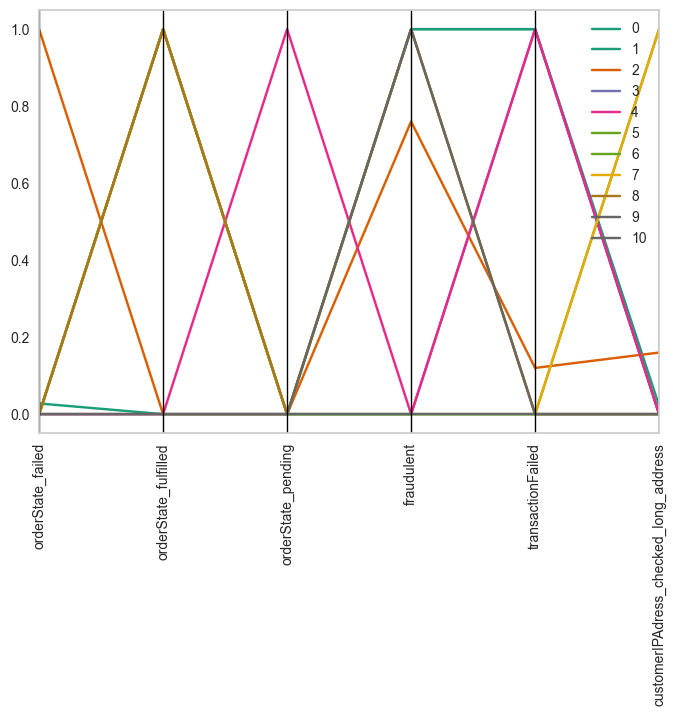

In [79]:
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

Debido a la gran cantidad de clusters, generar un analisis es complicado, por eso se elegira el top 4 clusters para analizar

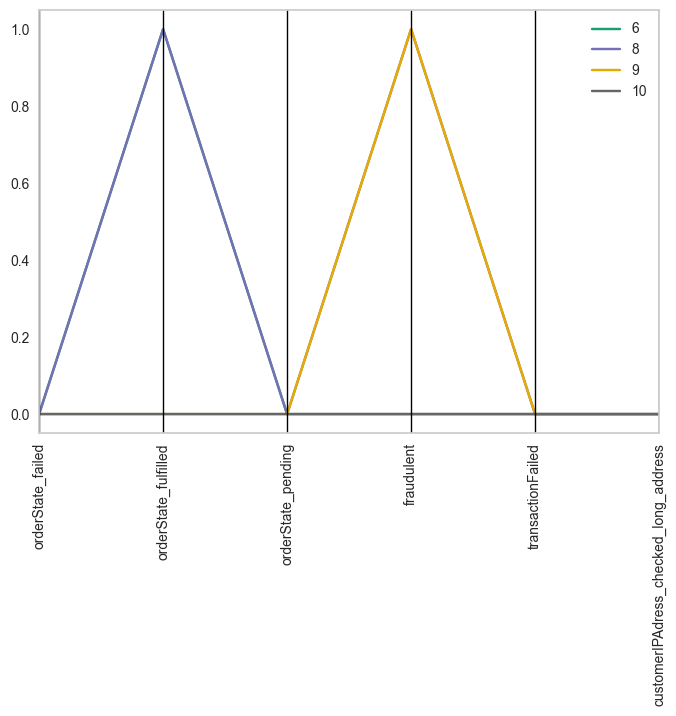

In [80]:
x_data_cl= x_data_cl[x_data_cl['cluster'].isin([9, 8, 6, 10])]
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

De esta forma podemos ver como el cluster amarillo (9) que es el de mayor cantidad de transacciones, contiene transacciones fraudulentas.
Analizando el resto de clusters:

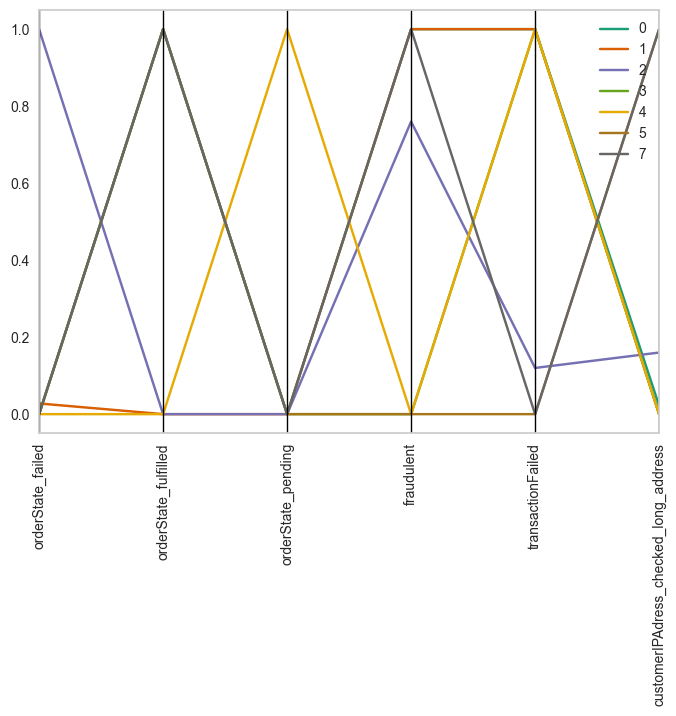

In [84]:
x_data_cl= x_data_cl[x_data_cl['cluster'].isin([0, 1, 2, 3, 4, 5, 7])]
d_orig, d_transf = coord_plot(x_data_cl, cluster_var)

En este caso:
- Cluster 1: transacciones fraudulentas y que fallaron.
- Cluster 7: transacciones no detectadas como fraudulentas, pasaron los controles y representan un PROBLEMA porque si son fraudulentas.
- Cluster 4: se observa que son trasacciones que pasaron OK, no son fraudulentas.
